In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from PIL import Image

from torch.utils.data import DataLoader
from load_data import FacesDataset
import json


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There are 4 images in the batch


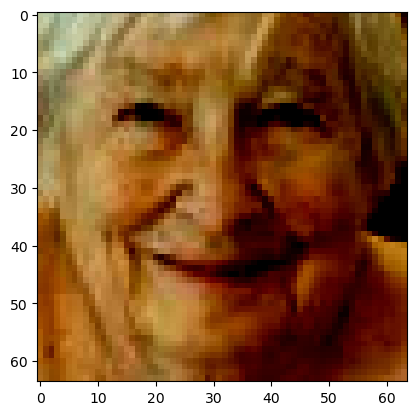

There are 1248 batches in the dataset


In [2]:
def display_images(data_path):
    
    # initializing dataloader upon pytorch dataset
    dataset = FacesDataset(data_path)
    dataloader = DataLoader(dataset, batch_size=4)

    # printing out by batch
    count = 0
    batch_count = 0
    for batch in dataloader:
        if count == 0:
            print(f'There are {len(batch)} images in the batch')
            count += 1
            batch_count += 1
            plt.imshow(batch[2].permute(1, 2, 0))
            plt.show()
        else:
            batch_count += 1
    
    print(f'There are {batch_count} batches in the dataset')

        # showing image, re-permuting so that pixel channels appear first
        #plt.imshow(batch[0].permute(1, 2, 0))
        #plt.show()

display_images('utkcropped')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There are 128 images in the batch


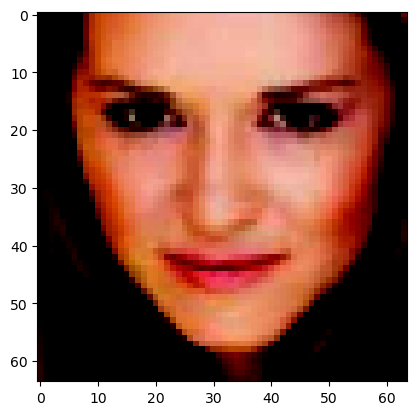

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


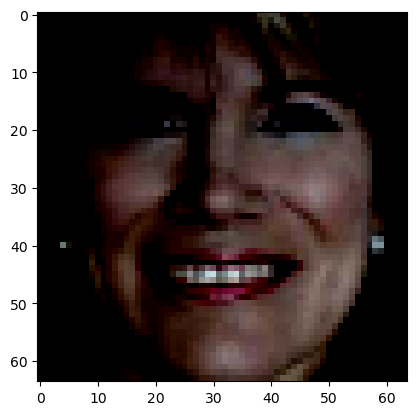

There are 2 batches in the dataset


In [5]:
def display_young_old_():

    with open('params.json', 'r') as param_reader:
            config = json.load(param_reader)

    model_params, training_params= config['model_params'], config['training_params']

    dataset = FacesDataset(config['data_path'], mode="conditional")
    dataloader = DataLoader(dataset, batch_size = model_params['batch_size'], shuffle=False)

    count = 0
    batch_count = 0 
    for batch_num, img_label_pair in enumerate(dataloader):

        young_images, old_images = img_label_pair

        if count == 0:
            print(f'There are {len(young_images)} images in the batch')
            count += 1
            batch_count += 1
            idx = 3
            plt.imshow(young_images[idx].permute(1, 2, 0))
            plt.show()
            plt.imshow(old_images[idx].permute(1, 2, 0))
            plt.show()
        else:
            batch_count += 1
            break

    print(f'There are {batch_count} batches in the dataset')


display_young_old_()

In [37]:
def generate_sample_image():

    with open('params.json', 'r') as param_reader:
            config = json.load(param_reader)

    model_params, training_params= config['model_params'], config['training_params']

    dataset = FacesDataset(config['data_path'], mode="conditional")
    dataloader = DataLoader(dataset, batch_size = model_params['batch_size'], shuffle=False)

    for batch_num, img_label_pair in enumerate(dataloader):

        young_images, old_images = img_label_pair
        
        count = 0
        if count == 0:
            count += 1
            idx = 3
            sample_young = young_images[idx]
            
            return sample_young

    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


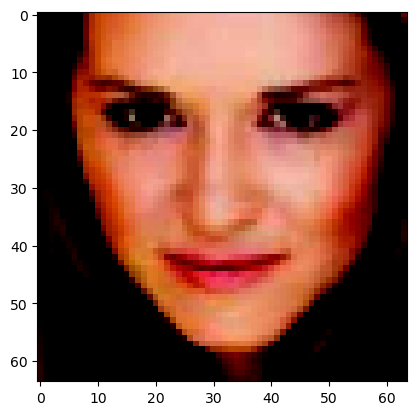

In [38]:
model = torch.load('models/conditional_gan_gen_epoch199expconditional_baseline', map_location=torch.device('cpu'))
sample_young = generate_sample_image()
plt.imshow(sample_young.permute(1, 2, 0))
plt.show()


In [39]:
print(sample_young.shape)
sample_young = sample_young[np.newaxis,:]
print(sample_young.shape)

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GPU unavailable, using CPU instead


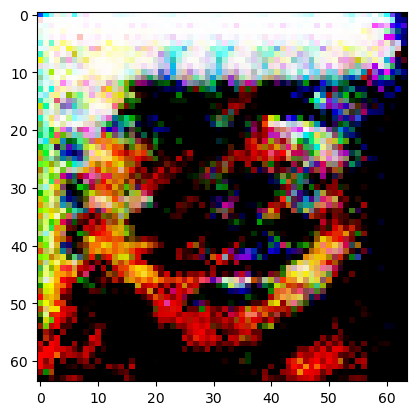

In [40]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    print("GPU unavailable, using CPU instead")
    device = torch.device("cpu")

output = model(device, sample_young)
output = output.detach().cpu().numpy()
output = np.squeeze(output) 
output = np.transpose(output, (1, 2, 0))

plt.imshow(output)
plt.show()